In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Quantitative Data and Histograms
------------------------------

Many of the variables that data scientists study are *quantitative*. For instance, we can study the amount of revenue earned by movies in recent decades. Our source is the [Internet Movie Database](http://www.imdb.com), an online database that contains information about movies, television shows, video games, and so on.

The table `top` consists of [U.S.A.'s top grossing movies (http://www.boxofficemojo.com/alltime/adjusted.htm) of all time. The first column contains the title of the movie; *Star Wars: The Force Awakens* has the top rank, with a box office gross amount of more than 900 million dollars in the United States. The second column contains the name of the studio; the third contains the U.S. box office gross in dollars; the fourth contains the  gross amount that would have been earned from ticket sales at 2016 prices; and the fifth contains the release year of the movie. 

There are 200 movies on the list. Here are the top ten.

In [17]:
top = Table.read_table('top_movies.csv')
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


Three-digit numbers are easier to work with than nine-digit numbers. So, we will add an additional *millions* column containing the adjusted gross box office revenue in millions.

In [30]:
millions = top.with_column('Millions', np.round(top.column(3)/1000000, 2))
millions

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015,906.72
Avatar,Fox,"760,507,625","846,120,800",2009,846.12
Titanic,Paramount,"658,672,302","1,178,627,900",1997,1178.63
Jurassic World,Universal,"652,270,625","687,728,000",2015,687.73
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012,668.87
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008,647.76
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999,785.72
Star Wars,Fox,"460,998,007","1,549,640,500",1977,1549.64
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015,465.68
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012,500.96


The `hist` method generates a *histogram* of the values in a column.

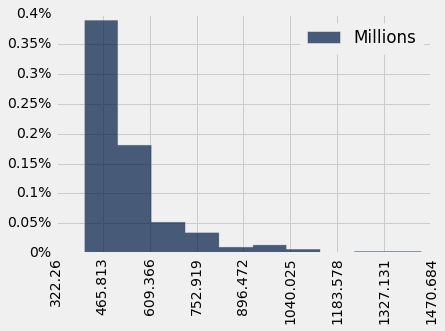

In [31]:
millions.hist('Millions')

The figure above shows the distribution of the amounts grossed, in millions of dollars. The amounts have been grouped into contiguous intervals called *bins*. Although in this dataset no movie grossed an amount that is exactly on the edge between two bins, it is worth noting that *hist* has an *endpoint convention*: bins include the data at their left endpoint, but not the data at their right endpoint. Sometimes, adjustments have to be made in the first or last bin, to ensure that the smallest and largest values of the variable are included. You saw an example of such an adjustment in the Census data used in the Tables section, where an age of "100" years actually meant "100 years old or older."

We can see that there are 10 bins (some bars are so low that they are hard to see), and that they all have the same width. We can also see that there the list contains no movie that grossed fewer than 300 million dollars; that is because we are considering only the top grossing movies of all time. It is a little harder to see exactly where the edges of the bins are placed. For example, it is not clear exactly where the value 500 lies on the horizontal axis, and so it is hard to judge exactly where the first bar ends and the second begins.

The optional argument *bins* can be used with *hist* to specify the edges of the bars. It must consist of a sequence of numbers that includes the left end of the first bar and the right end of the last bar. As the highest gross amount is somewhat over 760 on the horizontal scale, we will start by setting *bins* to be the array consisting of the numbers 300, 400, 500, and so on, ending with 2000.  

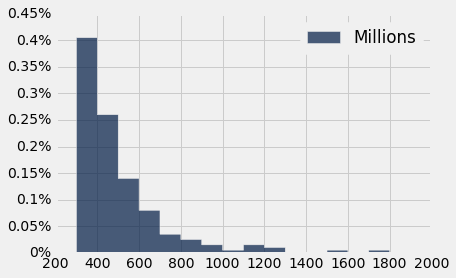

In [5]:
millions.hist('Millions', bins=np.arange(300,2001,100))

This figure is easier to read. On the horizontal axis, the labels 200, 400, 600, and so on are centered at the corresponding values. The tallest bar is for movies that grossed between 300 and  million and 400 million (adjusted) dollars; the bar for 400 to 500 million is about 5/8th as high. The height of each bar is proportional to the number of movies that fall within the x-axis range of the bar.

A very small number grossed more than 700 million dollars. This results in the figure being "skewed to the right,", or, less formally, having "a long right hand tail." Distributions of variables like income or rent often have this kind of shape.

The counts of values in different ranges can be computed from a table using the `bin` method, which takes a column label or index and an optional sequence or number of bins. The result is a tabular form of a histogram; it lists the counts of all values in the `'Millions'` column that are greater than or equal to the indicated `bin`, but less than the next `bin`'s starting value.

In [6]:
bins = millions.bin('Millions', bins=np.arange(300,2001,100))
bins

bin,Millions count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


The vertical axis of a histogram is the *density scale*. The height of each bar is the proportion of elements that fall into the corresponding bin, divided by the width of the bin. For example, the height of the bin from 300 to 400, which contains 81 of the 200 movies, is $\frac{81}{200} \cdot \frac{1}{400-300}$ = 0.405%.

In [7]:
starts = bins.column(0)
counts = bins.column(1)
counts.item(0) / sum(counts) / (starts.item(1) - starts.item(0))

0.0040500000000000006

The total area of this bar is 0.405, 100 times greater because its width is 100. This area is the proportion of all values in the `Millions` column that fall into the 300-400 bin. The area of all bars in a histogram sums to 1.

A histogram may contain bins of unequal size, but the area of all bars will still sum to 1. Below, the values in the `Millions` column are binned into four categories.

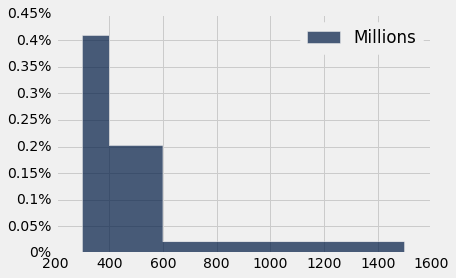

In [8]:
millions.hist('Millions', bins=[300, 400, 600, 1500])

Although the ranges 300-400 and 400-600 have nearly identical counts, the former is twice as tall as the latter because it is only half as wide. The density of values in that range is twice as high. Histograms display in visual form where on the number line values are most concentrated.

In [9]:
millions.bin('Millions', bins=[300, 400, 600, 1500])

bin,Millions count
300,81
400,80
600,37
1500,0


**Histogram of Counts.** It is possible to display counts directly in a chart, using the `normed=False` option of the `hist` method. The resulting chart has the same shape when bins all have equal widths, but the bar areas do not sum to 1.

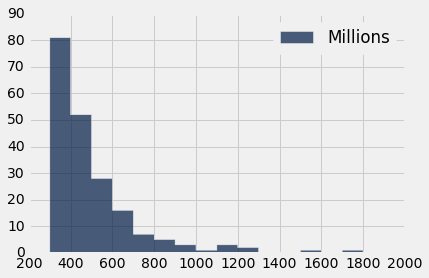

In [10]:
millions.hist('Millions', bins=np.arange(300,2001,100), normed=False)

While the count scale is perhaps more natural to interpret than the density scale, the chart becomes highly misleading when bins have different widths. Below, it appears (due to the count scale) that high-grossing movies are quite common, when in fact we have seen that they are relatively rare.

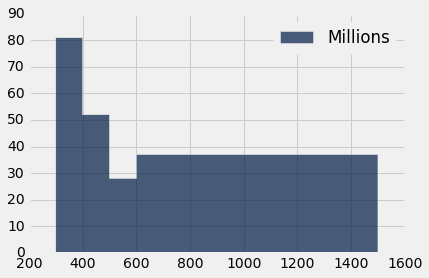

In [32]:
millions.hist('Millions', bins=[300, 400, 500, 600, 1500], normed=False)

Even though the method used is called *hist*, **the figure above is NOT A HISTOGRAM.** It gives the impression that movies are evenly distributed in the 300-600 range, but they are not. Moreover, it exaggerates the density of movies grossing more than 600 million. The height of each bar is simply plotted the number of movies in the bin, *without accounting for the difference in the widths of the bins*. The picture becomes even more skewed if the last two bins are combined.

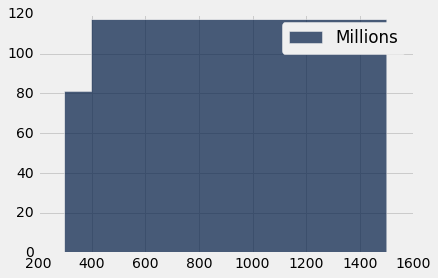

In [12]:
millions.hist('Millions', bins=[300, 400, 1500], normed=False)

In this count-based histogram, the shape of the distribution of movies is lost entirely.

**So what is a histogram?**

The figure above shows that what the eye perceives as "big" is area, not just height. This is particularly important when the bins are of different widths.

That is why a histogram has two defining properties:

1. The bins are contiguous (though some might be empty) and are drawn to scale.
2. The **area** of each bar is proportional to the number of entries in the bin. 

Property 2 is the key to drawing a histogram, and is usually achieved as follows:

$$
\mbox{area of bar} ~=~ \mbox{proportion of entries in bin}
$$

When drawn using this method, the histogram is said to be drawn *on the density scale*, and the total area of the bars is equal to 1.

To calculate the height of each bar, use the fact that the bar is a rectangle:

$$
\mbox{area of bar} = \mbox{height of bar} \times \mbox{width of bin}
$$

and so

$$
\mbox{height of bar} ~=~ 
\frac{\mbox{area of bar}}{\mbox{width of bin}} ~=~
\frac{\mbox{proportion of entries in bin}}{\mbox{width of bin}}
$$

**The level of detail, and the flat tops of the bars**

Even though the density scale correctly represents proportions using area, some detail is lost by placing different values into the same bins.

Take another look at the [300, 400) bin in the figure below. The flat top of the bar, at a level near 0.4%, hides the fact that the movies are somewhat unevenly distributed across the bin. 

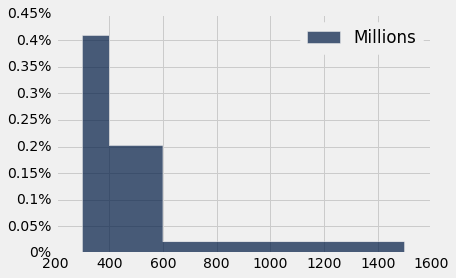

In [13]:
millions.hist('Millions', bins=[300, 400, 600, 1500], normed=True)

To see this, let us split the [150, 200) bin into ten narrower bins of width 10 million dollars each:

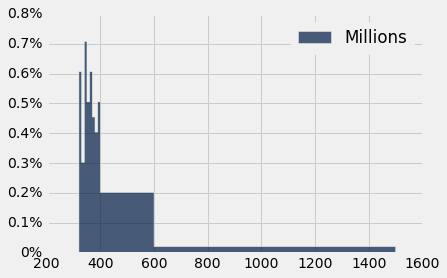

In [14]:
millions.hist('Millions', bins=[300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 600, 1500 ])

Some of the skinny bars are taller than 0.4% and others are shorter. By putting a flat top at 0.4% over the whole bin, we are deciding to ignore the finer detail and use the flat level as a rough approximation. Often, though not always, this is sufficient for understanding the general shape of the distribution.

Notice that because we have the entire dataset, we can draw the histogram in as fine a level of detail as the data and our patience will allow. However, if you are looking at a histogram in a book or on a website, and you don't have access to the underlying dataset, then it becomes important to have a clear understanding of the "rough approximation" of the flat tops.

**The density scale**

The height of each bar is a proportion divided by a bin width. Thus, for this datset, the values on the vertical axis are "proportions per million dollars." To understand this better, look again at the [150, 200) bin. The bin is 50 million dollars wide. So we can think of it as consisting of 50 narrow bins that are each 1 million dollars wide. The bar's height of roughly "0.004 per million dollars" means that in each of those 50 skinny bins of width 1 million dollars, the proportion of movies is roughly 0.004. 

Thus the height of a histogram bar is a proportion per unit on the horizontal axis, and can be thought of as the *density* of entries per unit width. 

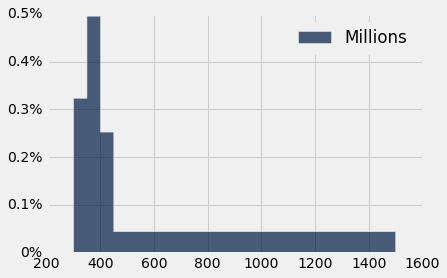

In [15]:
millions.hist('Millions', bins=[300, 350, 400, 450, 1500])


**Density Q&A**

Look again at the histogram, and this time compare the [400, 450) bin with the [450, 1500) bin.

**Q**: Which has more movies in it? 

**A**: The [450, 1500) bin. It has 92 movies, compared with 25 movies in the [400, 450) bin.

**Q**: Then why is the [450, 1500) bar so much shorter than the [400, 450) bar?

**A**: Because height represents density per unit width, not the number of movies in the bin. The [450, 1500) bin has more movies than the [400, 450) bin, but it is also a whole lot wider. So the density is much lower.

In [16]:
millions.bin('Millions', bins=[300, 350, 400, 450, 1500])

bin,Millions count
300,32
350,49
400,25
450,92
1500,0


**Bar chart or histogram?** 

Bar charts display the distributions of categorical variables. All the bars in a bar chart have the same width. The lengths (or heights, if the bars are drawn vertically) of the bars are proportional to the number of entries.

Histograms display the distributions of quantitative variables. The bars can have different widths. The areas of the bars are proportional to the number of entries. 

**Multiple histograms**

In all the examples in this section, we have drawn a single histogram. However, if a data table contains several columns, then *barh* and *hist* can be used to draw several charts at once. We will cover this feature in a later section.